In [11]:
%run data.ipynb
import pandas as pd

In [60]:
# spotify_lyrics = pd.read_csv('./lyricspotify.csv')
# missed = pd.read_csv('./lastfmmissed.csv')
# lastfm = pd.read_csv('./lastfm.csv')
# missed = missed[missed.columns[-8:]]
# missed.head()
# lastfm = lastfm[lastfm.columns[1:]]
# last_fm_total = pd.concat([lastfm,missed])
# last_fm_total = last_fm_total.rename(columns={'track-title':'song'})
# last_fm_total['artist'] = last_fm_total['artist'].apply(lambda x: x.lower())
# last_fm_total['artist'] = last_fm_total['artist'].apply(lambda x: x.replace(' ', '-'))
# spotify_lyrics.drop_duplicates(subset=['song'], keep='first', inplace=True)
# final = spotify_lyrics.merge(last_fm_total, on=['song', 'artist'])
# final

,Unnamed: 0,artist,song,lyrics,features,danceability,energy,loudness,speechiness,liveness,tempo,valence,isrc,release_date,album,duration,listeners,playcount,single_release,track_no
0,19,drake,Survival,I been waitin' on this Yeah All of this disord...,NaN,0.607,0.596,-9.090,0.3580,0.1230,77.324,0.1490,USCM51800189,2018-06-29,Scorpion,136,69548,229946,NaN,1
1,20,drake,Nonstop,"Tay Keith, fuck these niggas up! Look, I just ...",NaN,0.912,0.412,-8.074,0.1240,0.1040,154.983,0.4220,USCM51800191,2018-06-29,Scorpion,238,108576,750236,NaN,2
2,21,drake,Elevate,"Ayy, elevate, elevate Only obligation is to te...",NaN,0.758,0.474,-8.720,0.1460,0.1160,76.062,0.0541,USCM51800196,2018-06-29,Scorpion,185,63287,255611,NaN,3
3,22,drake,Emotionless,"You've got me feeling emotions Ayy, higher Ahh...",NaN,0.413,0.677,-5.120,0.2550,0.0793,172.501,0.0845,USCM51800199,2018-06-29,Scorpion,302,65061,273895,NaN,4
4,23,drake,God's Plan,"Yeah, they wishin' and wishin' and wishin' and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scorpion,199,235559,2144208,"16 Feb 2018, 20:15",5
5,24,drake,I'm Upset,Yeah I'm workin' on dyin' I'm upset Fifty thou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scorpion,214,82283,432575,NaN,6
6,25,drake,8 Out of 10,Too rich for who? Y'all just got rich again Wh...,NaN,0.529,0.690,-7.870,0.7400,0.4980,170.540,0.3110,USCM51800202,2018-06-29,Scorpion,195,59637,210660,NaN,7
7,26,drake,Mob Ties,"Ayy, sick of these niggas (sick) Sick of these...",NaN,0.755,0.575,-8.393,0.0678,0.2760,85.987,0.4900,USCM51800211,2018-06-29,Scorpion,205,64982,361506,NaN,8
8,27,drake,Can't Take a Joke,Ayo blast that shit Maxx Blast that shit back ...,NaN,0.761,0.598,-7.249,0.1820,0.0839,173.897,0.4470,USCM51800215,2018-06-29,Scorpion,163,6189,32161,NaN,9
9,28,drake,Sandra's Rose,"Yeah, no more, no more Baby, baby, baby, baby,...",NaN,0.487,0.849,-5.432,0.2460,0.1430,152.093,0.5200,USCM51800218,2018-06-29,Scorpion,216,5714,24236,NaN,10


In [12]:
final

,Unnamed: 0,artist,song,lyrics,features,danceability,energy,loudness,speechiness,liveness,...,release_date,album,duration,listeners,playcount,single_release,track_no,playcount_percentage,is_hit,unique-words
0,19,drake,Survival,I been waitin' on this Yeah All of this disord...,NaN,0.607,0.596,-9.090,0.3580,0.1230,...,2018-06-29,Scorpion,136,69548,229946,NaN,1,0.050994,False,159.0
1,20,drake,Nonstop,"Tay Keith, fuck these niggas up! Look, I just ...",NaN,0.912,0.412,-8.074,0.1240,0.1040,...,2018-06-29,Scorpion,238,108576,750236,NaN,2,0.079610,False,224.0
2,21,drake,Elevate,"Ayy, elevate, elevate Only obligation is to te...",NaN,0.758,0.474,-8.720,0.1460,0.1160,...,2018-06-29,Scorpion,185,63287,255611,NaN,3,0.046403,False,159.0
3,22,drake,Emotionless,"You've got me feeling emotions Ayy, higher Ahh...",NaN,0.413,0.677,-5.120,0.2550,0.0793,...,2018-06-29,Scorpion,302,65061,273895,NaN,4,0.047704,False,226.0
6,25,drake,8 Out of 10,Too rich for who? Y'all just got rich again Wh...,NaN,0.529,0.690,-7.870,0.7400,0.4980,...,2018-06-29,Scorpion,195,59637,210660,NaN,7,0.043727,False,201.0
7,26,drake,Mob Ties,"Ayy, sick of these niggas (sick) Sick of these...",NaN,0.755,0.575,-8.393,0.0678,0.2760,...,2018-06-29,Scorpion,205,64982,361506,NaN,8,0.047646,False,120.0
8,27,drake,Can't Take a Joke,Ayo blast that shit Maxx Blast that shit back ...,NaN,0.761,0.598,-7.249,0.1820,0.0839,...,2018-06-29,Scorpion,163,6189,32161,NaN,9,0.004538,False,125.0
9,28,drake,Sandra's Rose,"Yeah, no more, no more Baby, baby, baby, baby,...",NaN,0.487,0.849,-5.432,0.2460,0.1430,...,2018-06-29,Scorpion,216,5714,24236,NaN,10,0.004190,False,233.0
10,29,drake,Talk Up,"Ayy, ayy Lot of 6's in here tonight Yeah, yeah...",NaN,0.758,0.490,-9.877,0.1390,0.2920,...,2018-06-29,Scorpion,223,37762,101435,NaN,11,0.027688,False,185.0
11,30,drake,Is There More,Only holdin' up I do is my end of the bargain ...,NaN,0.698,0.547,-7.607,0.3150,0.1590,...,2018-06-29,Scorpion,226,42580,133011,NaN,12,0.031221,False,249.0


In [13]:
cols=final.columns.tolist()
cols

['Unnamed: 0',
 'artist',
 'song',
 'lyrics',
 'features',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'liveness',
 'tempo',
 'valence',
 'isrc',
 'release_date',
 'album',
 'duration',
 'listeners',
 'playcount',
 'single_release',
 'track_no',
 'playcount_percentage',
 'is_hit',
 'unique-words']

In [15]:
cols=final.columns.tolist()
cols
newcols=['Unnamed: 0',
 'artist',
 'song',
 'lyrics',
 'features',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'liveness',
 'tempo',
 'valence',
 'duration',
 'listeners','unique-words','playcount_percentage',
 'playcount','track_no','isrc','release_date',
 'album',
 'single_release', 'is_hit',]
final2=final.reindex((newcols),axis=1)
final2
NUMS = final2.iloc[:,5:18]
final2.isna().sum()
NUMS.head()

,danceability,energy,loudness,speechiness,liveness,tempo,valence,duration,listeners,unique-words,playcount_percentage,playcount,track_no
0,0.607,0.596,-9.090,0.358,0.1230,77.324,0.1490,136,69548,159.0,0.050994,229946,1
1,0.912,0.412,-8.074,0.124,0.1040,154.983,0.4220,238,108576,224.0,0.079610,750236,2
2,0.758,0.474,-8.720,0.146,0.1160,76.062,0.0541,185,63287,159.0,0.046403,255611,3
3,0.413,0.677,-5.120,0.255,0.0793,172.501,0.0845,302,65061,226.0,0.047704,273895,4
6,0.529,0.690,-7.870,0.740,0.4980,170.540,0.3110,195,59637,201.0,0.043727,210660,7


In [16]:
NUMS.corr()

,danceability,energy,loudness,speechiness,liveness,tempo,valence,duration,listeners,unique-words,playcount_percentage,playcount,track_no
danceability,1.000000,0.053581,0.205242,0.252516,-0.049942,0.051488,0.146439,-0.137856,-0.218548,0.361948,0.026508,-0.199416,-0.031884
energy,0.053581,1.000000,0.734546,-0.036502,0.147305,0.093280,0.418514,0.003554,0.048341,0.074998,0.026144,0.032257,-0.054740
loudness,0.205242,0.734546,1.000000,-0.089322,0.060632,0.066864,0.247315,-0.102841,-0.075278,0.092799,0.081045,-0.046364,-0.088637
speechiness,0.252516,-0.036502,-0.089322,1.000000,0.152348,0.131813,-0.051384,0.002845,-0.239853,0.557049,-0.055678,-0.229020,0.073874
liveness,-0.049942,0.147305,0.060632,0.152348,1.000000,0.054411,0.026602,0.025930,-0.015707,0.138856,-0.041934,-0.031916,0.017532
tempo,0.051488,0.093280,0.066864,0.131813,0.054411,1.000000,0.011957,-0.056414,-0.074371,0.092226,-0.009054,-0.065520,0.036420
valence,0.146439,0.418514,0.247315,-0.051384,0.026602,0.011957,1.000000,-0.117885,0.142086,-0.049899,-0.004155,0.099337,-0.019488
duration,-0.137856,0.003554,-0.102841,0.002845,0.025930,-0.056414,-0.117885,1.000000,0.165177,0.293285,-0.085545,0.161748,0.113427
listeners,-0.218548,0.048341,-0.075278,-0.239853,-0.015707,-0.074371,0.142086,0.165177,1.000000,-0.271135,0.099126,0.957281,-0.028528
unique-words,0.361948,0.074998,0.092799,0.557049,0.138856,0.092226,-0.049899,0.293285,-0.271135,1.000000,-0.077610,-0.253372,0.048844


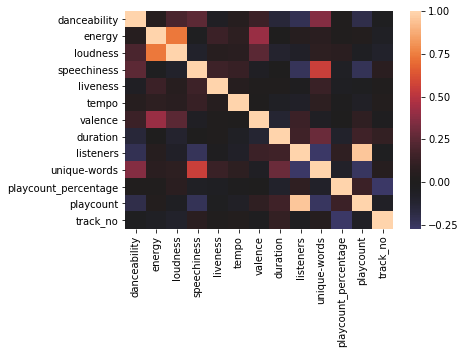

In [17]:
import seaborn as sns
sns.heatmap(NUMS.corr(),center=0);
#drop loudness or energy
#drop listeners or playcount

In [18]:
final2 = final2.drop('loudness',axis=1)
final2 = final2.drop('Unnamed: 0',axis=1)
final2 = final2.drop('playcount',axis=1)

In [76]:
sum(final2.album.str.contains("Hits"))

22

In [78]:
import datetime
from datetime import date
import re

In [79]:
#GET RID OF NULL DATES
final2 = final2[final2.release_date.notnull()]
for idx, row in final2.iterrows():
    final2['today']=datetime.datetime.today().strftime('%Y-%m-%d')

In [80]:
import numpy as np
final2['age']=np.nan
for idx, row in final2.iterrows():
    date=None
    today=None
    try:
        date = datetime.datetime.strptime(final2.loc[idx,'release_date'],"%Y-%m-%d")
        today = datetime.datetime.strptime(final2.loc[idx,'today'],"%Y-%m-%d")
        final2.loc[idx,'age']=abs((today-date).days)
    except:
        pass

In [81]:
final2['is_hit']=(final2['is_hit'] == True).astype(int)

In [86]:
final2['list_day']=np.nan
for idx,row in final2.iterrows():
    days=None
    listnr=None
    days=final2.loc[idx,'age']
    listnr=final2.loc[idx, 'listeners']
    final2.loc[idx,'list_day']=listnr/days

In [89]:
final2[~final2.artist.str.contains("the-beatles")]#how can i get rid of beatles
final2.nlargest(30, 'list_day')
#DROP GREATEST HITS
final2[~final2.album.str.contains("Greatest")]#how can i get rid of greatest???
final2.nlargest(30, 'listeners')

,artist,song,lyrics,features,danceability,energy,speechiness,liveness,tempo,valence,...,track_no,isrc,release_date,album,single_release,is_hit,age,nan,today,list_day
621,the-beatles,Can't Buy Me Love,"Can't buy me love, love Can't buy me love I'll...",NaN,0.844,0.299,0.0621,0.1020,102.088,0.566,...,5,PLS921748003,2018-12-13,1,"06 Sep 2008, 17:14",0,27.0,2019-01-09,2019-01-09,25497.000000
467,queen,Now I'm Here,"Here I stand Look around, around, around, arou...",NaN,0.347,0.919,0.1390,0.7140,133.860,0.130,...,11,GBUM71805974,2018-10-19,Greatest Hits,"24 Feb 2009, 01:11",0,82.0,2019-01-09,2019-01-09,4526.890244
500,michael-jackson,Thriller,It's close to midnight Something evil's lurkin...,NaN,0.764,0.887,0.0738,0.8470,118.421,0.721,...,4,USSM19902989,2017-09-27,Thriller,"07 Nov 2008, 21:45",1,469.0,2019-01-09,2019-01-09,2220.524520
505,michael-jackson,Dirty Diana,You'll never make me stay So take your weight ...,NaN,0.734,0.801,0.0437,0.3240,131.424,0.331,...,6,USSM11204988,2017-09-27,The Essential Michael Jackson,"16 Jun 2009, 18:48",0,469.0,2019-01-09,2019-01-09,927.744136
19,drake,In My Feelings,"Trap, TrapMoneyBenny This shit got me in my fe...",NaN,0.835,0.626,0.1250,0.3960,91.030,0.350,...,9,USCM51800206,2018-06-29,Scorpion,"23 Jul 2018, 16:20",0,194.0,2019-01-09,2019-01-09,847.417526
727,led-zeppelin,Communication Breakdown,"Hey, girl, stop what you're doing! Hey, girl, ...",NaN,0.367,0.779,0.0488,0.2880,90.354,0.794,...,2,GBCAD1600586,2016-09-16,Mothership,"19 Jul 2008, 04:52",0,845.0,2019-01-09,2019-01-09,753.494675
70,camila-cabello,Havana,"Hey Havana, ooh na-na (ayy) Half of my heart i...",NaN,0.765,0.523,0.0300,0.1320,104.988,0.394,...,4,USSM11706905,2018-01-12,Camila,"05 Aug 2017, 00:33",1,362.0,2019-01-09,2019-01-09,687.955801
73,camila-cabello,Real Friends,"No, I think I'll stay in tonight Skip the conv...",NaN,0.701,0.512,0.0969,0.1350,91.947,0.663,...,7,USSM11806903,2018-08-16,Camila,"03 Feb 2018, 04:14",0,146.0,2019-01-09,2019-01-09,682.904110
37,eminem,The Ringer,"*Plane crash* Yeah (Illa) Yo, I'm just gonna w...",NaN,0.939,0.551,0.2910,0.1920,118.552,0.420,...,1,USUM71813329,2018-08-31,Kamikaze,NaN,1,131.0,2019-01-09,2019-01-09,654.641221
323,imagine-dragons,It's Time,So this is what you meant When you said that y...,NaN,0.751,0.825,0.0362,0.2500,117.019,0.575,...,3,QMQJV1500039,2015-12-18,Night Visions,"25 Jun 2012, 17:23",0,1118.0,2019-01-09,2019-01-09,592.184258


In [50]:
import matplotlib.pyplot as plt

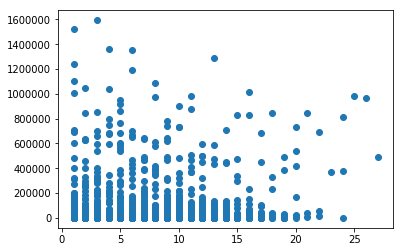

In [51]:
plt.scatter(final2.track_no,final2.listeners)

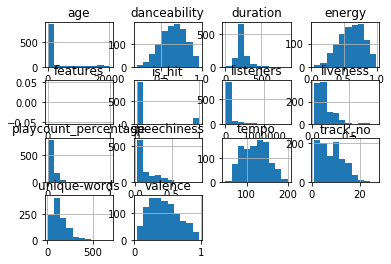

In [52]:
final2.hist()
plt.show()

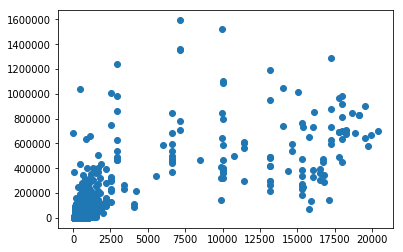

In [55]:
plt.scatter(final2.age,final2.listeners)

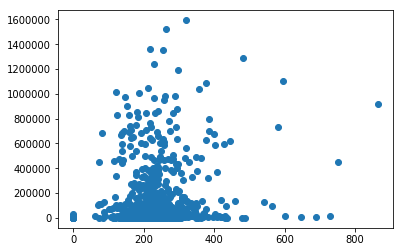

In [57]:
plt.scatter(final2.duration,final2.listeners)